In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/cars.csv')

In [ ]:
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [ ]:
df.size

180

In [ ]:
df.shape

(36, 5)

In [ ]:
df.describe()

,Volume,Weight,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571
min,900.000000,790.000000,90.000000
25%,1475.000000,1117.250000,97.750000
50%,1600.000000,1329.000000,99.000000
75%,2000.000000,1418.250000,105.000000
max,2500.000000,1746.000000,120.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


In [ ]:
for i in df.columns:
  print(i)

Car
Model
Volume
Weight
CO2


## Single variable

In [ ]:
X = pd.DataFrame(df, columns = ['Volume'])
X.head()

,Volume
0,1000
1,1200
2,1000
3,900
4,1500


In [ ]:
y = df['CO2'].to_numpy()
y

array([ 99,  95,  95,  90, 105, 105,  90,  92,  98,  99,  99, 101,  99,
        94,  97,  97,  99, 104, 104, 105,  94,  99,  99,  99,  99, 102,
       104, 114, 109, 114, 115, 117, 104, 108, 109, 120])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 354)

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)
print(f'Coefficients: {reg.coef_}')
print(f'Intercept: {reg.intercept_}')
print(f'Variance score: {reg.score(X, y)}')

Coefficients: [0.0103012]
Intercept: 85.95807228915663
Variance score: 0.34244852442152063


In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
print(f'Mean squared error is: {mean_squared_error(y_test, y_pred)}')

Mean squared error is: 27.00550540915029


In [ ]:
data = {'Actual Values': y_test, 'Predicted Values': y_pred}
prediction = pd.DataFrame(data)
prediction

,Actual Values,Predicted Values
0,99,97.289398
1,98,101.409880
2,105,106.560482
3,105,101.409880
4,99,102.440000
5,99,102.440000
6,99,107.590602
7,120,111.711084
8,90,95.229157
9,104,102.440000


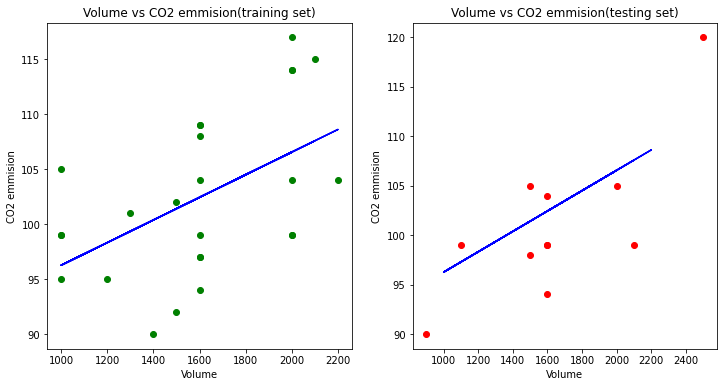

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))

ax[0].scatter(X_train, y_train, color = 'green')
ax[0].plot(X_train, reg.predict(X_train), color = 'blue')
ax[0].set_title("Volume vs CO2 emmision(training set)")
ax[0].set_xlabel("Volume")
ax[0].set_ylabel("CO2 emmision")

ax[1].scatter(X_test, y_test, color = 'red')
ax[1].plot(X_train, reg.predict(X_train), color = 'blue')
ax[1].set_title("Volume vs CO2 emmision(testing set)")
ax[1].set_xlabel("Volume")
ax[1].set_ylabel("CO2 emmision")

plt.show() 

## Multi variable

In [ ]:
X = pd.DataFrame(df, columns = ['Volume', 'Weight'])
X.head()

,Volume,Weight
0,1000,790
1,1200,1160
2,1000,929
3,900,865
4,1500,1140


In [ ]:
y = df['CO2'].to_numpy()
y

array([ 99,  95,  95,  90, 105, 105,  90,  92,  98,  99,  99, 101,  99,
        94,  97,  97,  99, 104, 104, 105,  94,  99,  99,  99,  99, 102,
       104, 114, 109, 114, 115, 117, 104, 108, 109, 120])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 6384)

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)
print(f'Coefficients: {reg.coef_}')
print(f'Intercept: {reg.intercept_}')
print(f'Variance score: {reg.score(X, y)}')

Coefficients: [0.00919187 0.00885163]
Intercept: 75.1474651075566
Variance score: 0.357527211889605


In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
print(f'Mean squared error is: {mean_squared_error(y_test, y_pred)}')

Mean squared error is: 31.312828817542588


In [ ]:
data = {'Actual Values': y_test, 'Predicted Values': y_pred}
prediction = pd.DataFrame(data)
prediction

,Actual Values,Predicted Values
0,104,106.720130
1,115,108.657254
2,105,92.562498
3,101,95.860007
4,104,100.786217
5,90,91.076806
6,99,101.936929
7,99,93.933117
8,104,106.699661
